# scRNA-seq metrics summary

In [1]:
library(stringr)
library(Seurat)
library(dplyr)
library(biomaRt)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Fresh

In [2]:
sums <- Sys.glob(file.path("/projects/PPC/pipeline/scRNA-Seq/pp_190304/*/outs/metrics_summary.csv"))

In [3]:
df = read.csv(sums[1])
rownames(df) <- str_split_fixed(str_split_fixed(sums[1], "/", 8)[, 7], "-", 4)[, 1]

for( i in seq(2, length(sums))){
    
    f = read.csv(sums[i])
    rownames(f) <- str_split_fixed(str_split_fixed(sums[i], "/", 8)[, 7], "-", 4)[, 1]
    df <- rbind(df, f)   
}

In [7]:
mean(as.numeric(gsub(",", "", df$Number.of.Reads)))

[1] 163296968

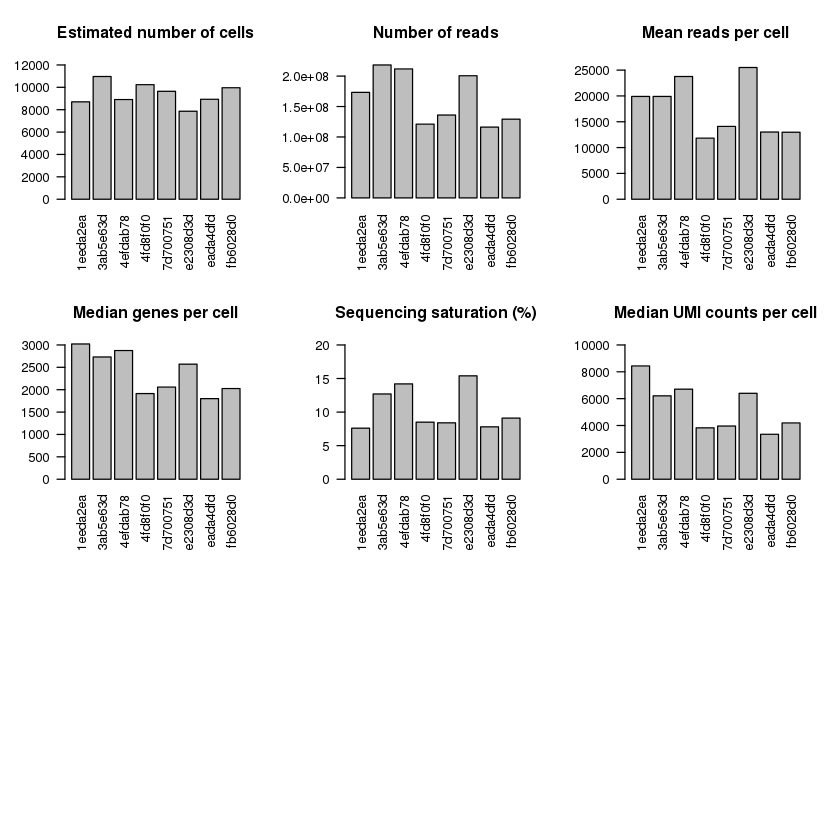

In [4]:
par(mfrow = c(3, 3))
barplot(as.numeric(gsub(",", "", df$Estimated.Number.of.Cells)), names.arg = rownames(df), las = 2, ylim = c(0, 12000), main = "Estimated number of cells")
barplot(as.numeric(gsub(",", "", df$Number.of.Reads)), names.arg = rownames(df), las = 2, main = "Number of reads")
barplot(as.numeric(gsub(",", "", df$Mean.Reads.per.Cell)), names.arg = rownames(df), las = 2, ylim = c(0, 26000), main = "Mean reads per cell")
barplot(as.numeric(gsub(",", "", df$Median.Genes.per.Cell)), names.arg = rownames(df), las = 2, ylim = c(0, 3000), main = "Median genes per cell")
barplot(as.numeric(gsub("%", "", df$Sequencing.Saturation)), names.arg = rownames(df), las = 2, ylim = c(0, 20), main = "Sequencing saturation (%)")
barplot(as.numeric(gsub(",", "", df$Median.UMI.Counts.per.Cell)), names.arg = rownames(df), ylim = c(0, 10000), las = 2, main = "Median UMI counts per cell")

# Cryopreserved

In [23]:
sums <- Sys.glob(file.path("/projects/PPC/pipeline/scRNA-Seq/190708_K00180_0854_AH75KHBBXY/8f38fc74-ec4a-4014-8462-6e10e018f4c3/outs/metrics_summary.csv"))

In [24]:
sums <- c(sums, Sys.glob(file.path("/projects/PPC/pipeline/scRNA-Seq/190326_K00180_0777_AH3CH7BBXY/04cd9285-b478-468a-a055-a9d82c99b016/outs/metrics_summary.csv")))

In [25]:
sums

[1] "/projects/PPC/pipeline/scRNA-Seq/190708_K00180_0854_AH75KHBBXY/8f38fc74-ec4a-4014-8462-6e10e018f4c3/outs/metrics_summary.csv"
[2] "/projects/PPC/pipeline/scRNA-Seq/190326_K00180_0777_AH3CH7BBXY/04cd9285-b478-468a-a055-a9d82c99b016/outs/metrics_summary.csv"

In [26]:
df = read.csv(sums[1])
rownames(df) <- str_split_fixed(str_split_fixed(sums[1], "/", 8)[, 7], "-", 4)[, 1]

for( i in seq(2, length(sums))){
    
    f = read.csv(sums[i])
    rownames(f) <- str_split_fixed(str_split_fixed(sums[i], "/", 8)[, 7], "-", 4)[, 1]
    df <- rbind(df, f)   
}

In [28]:
df

,Estimated.Number.of.Cells,Mean.Reads.per.Cell,Median.Genes.per.Cell,Number.of.Reads,Valid.Barcodes,Sequencing.Saturation,Q30.Bases.in.Barcode,Q30.Bases.in.RNA.Read,Q30.Bases.in.UMI,Reads.Mapped.to.Genome,Reads.Mapped.Confidently.to.Genome,Reads.Mapped.Confidently.to.Intergenic.Regions,Reads.Mapped.Confidently.to.Intronic.Regions,Reads.Mapped.Confidently.to.Exonic.Regions,Reads.Mapped.Confidently.to.Transcriptome,Reads.Mapped.Antisense.to.Gene,Fraction.Reads.in.Cells,Total.Genes.Detected,Median.UMI.Counts.per.Cell
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
8f38fc74,"9,936","28,462","3,116","282,806,038",98.7%,19.3%,98.2%,60.7%,97.9%,85.2%,80.1%,3.1%,17.0%,60.0%,56.5%,0.9%,84.6%,"31,899","7,810"
04cd9285,"13,318","18,526","2,791","246,737,603",98.8%,12.1%,95.8%,53.1%,95.7%,78.3%,73.4%,3.0%,13.6%,56.8%,53.7%,0.7%,88.0%,"31,022","6,347"


In [27]:
mean(as.numeric(gsub(",", "", df$Number.of.Reads)))

[1] 264771820

# Compare #UMI vs. #genes in sample with high and low read count

In [19]:
CreateSeuratFrazer <- function(filen, name){
    
    tiss <- Read10X(data.dir = filen)
    tiss <- CreateSeuratObject(raw.data = tiss, min.cells = 3, min.genes = 200, project = name)
    return(tiss)
}

In [81]:
samples = read.csv("../Table/ppc_sc_master_sample_sheet.csv")[, c("seq_sample_uuid", "UDID", "pct_PDX1_NKX6.1")]

In [11]:
sums <- Sys.glob(file.path("/projects/PPC/pipeline/scRNA-Seq/pp_190304/*/outs/filtered_feature_bc_matrix"))

In [12]:
samples$scouts = paste("/projects/PPC/pipeline/scRNA-Seq/pp_190304/", samples$seq_sample_uuid, "/outs/filtered_feature_bc_matrix", sep = "")

In [3]:
high = "/projects/PPC/pipeline/scRNA-Seq/pp_190304/e2308d3d-f183-44e4-b0b7-2dff4a5006da_v2/outs/filtered_feature_bc_matrix/"
tiss <- Read10X(data.dir = high)
tiss <- CreateSeuratObject(raw.data = tiss, min.cells = 3, min.genes = 200, project = "PPC028")

high <- tiss
high

In [14]:
low = "/projects/PPC/pipeline/scRNA-Seq/pp_190304/4fd8f0f0-2356-451c-a61f-c30610f1141c/outs/filtered_feature_bc_matrix/"
tiss <- Read10X(data.dir = low)
tiss <- CreateSeuratObject(raw.data = tiss, min.cells = 3, min.genes = 200, project = "PPC030")

low <- tiss
low

An object of class seurat in project PPC030 
 21365 genes across 10222 samples.

In [38]:
high_500UMI  <- FilterCells(object = high, subset.names = c("nGene", "nUMI"), low.thresholds = c(500, 500))
high_1000UMI <- FilterCells(object = high, subset.names = c("nGene", "nUMI"), low.thresholds = c(500, 1000))
high_2000UMI <- FilterCells(object = high, subset.names = c("nGene", "nUMI"), low.thresholds = c(500, 2000))

In [37]:
low_500UMI  <- FilterCells(object = low, subset.names = c("nGene", "nUMI"), low.thresholds = c(500, 500))
low_1000UMI <- FilterCells(object = low, subset.names = c("nGene", "nUMI"), low.thresholds = c(500, 1000))
low_2000UMI <- FilterCells(object = low, subset.names = c("nGene", "nUMI"), low.thresholds = c(500, 2000))

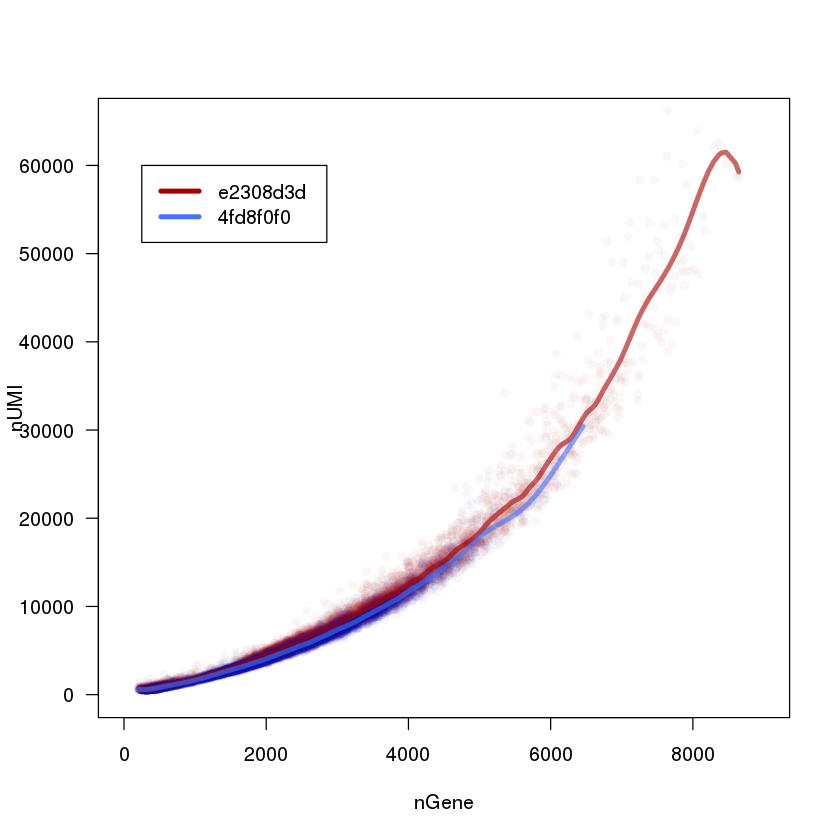

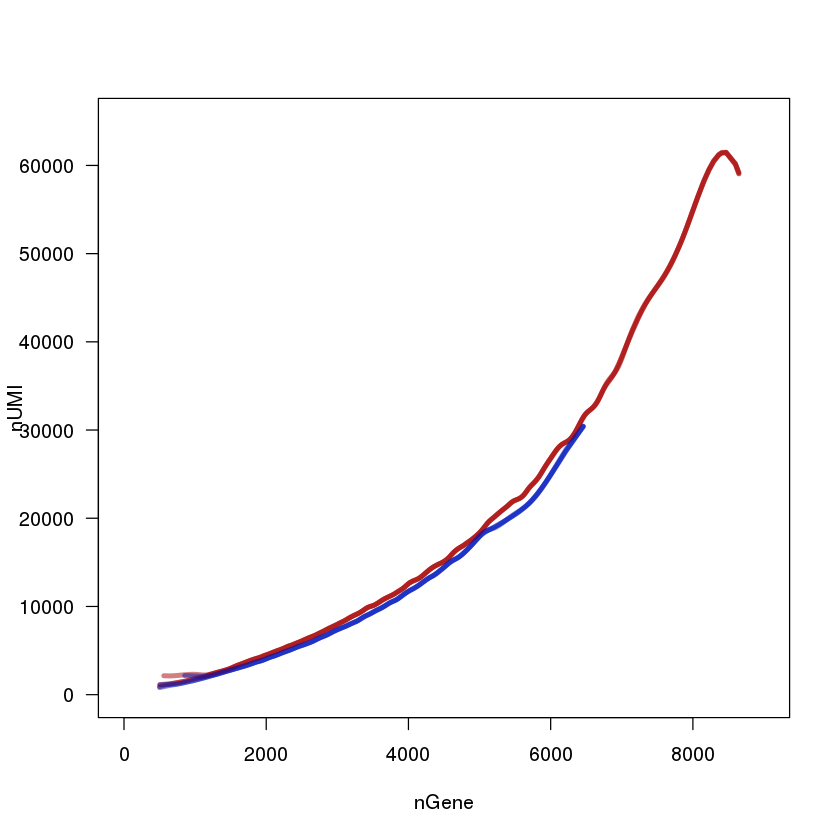

In [76]:
# par(mfrow = c(2,2))
plot(1, type="n", xlim=c(0, 9000), ylim=c(0, 65000), xlab = "nGene", ylab = "nUMI", las = 1, pch = 16)
points(high@meta.data$nGene, high@meta.data$nUMI, xlab = "nGene", ylab = "nUMI", las = 1, pch = 16, col = "#a5000008")
points(low@meta.data$nGene, low@meta.data$nUMI, xlab = "nGene", ylab = "nUMI", las = 1, pch = 16, col = "#0019bc08")
lines(smooth.spline(high@meta.data$nGene, high@meta.data$nUMI), col = "#a5000097",  lwd = 4)
lines(smooth.spline(low@meta.data$nGene,  low@meta.data$nUMI),  col = "#4472ff97", lwd = 4)

legend(250,60000, c("e2308d3d", "4fd8f0f0"), lty=c(1,1), lwd=c(4,4),col=c("#a50000","#4472ff"))


plot(1, type="n", xlim=c(0, 9000), ylim=c(0, 65000), xlab = "nGene", ylab = "nUMI", las = 1, pch = 16)

lines(smooth.spline(high_500UMI@meta.data$nGene, high_500UMI@meta.data$nUMI), col = "#a5000080",  lwd = 4)
lines(smooth.spline(low_500UMI@meta.data$nGene,  low_500UMI@meta.data$nUMI),  col = "#0019bc80", lwd = 4)

lines(smooth.spline(high_1000UMI@meta.data$nGene, high_1000UMI@meta.data$nUMI), col = "#a5000080",  lwd = 4)
lines(smooth.spline(low_1000UMI@meta.data$nGene,  low_1000UMI@meta.data$nUMI),  col = "#0019bc80", lwd = 4)

lines(smooth.spline(high_2000UMI@meta.data$nGene, high_2000UMI@meta.data$nUMI), col = "#a5000080",  lwd = 4)
lines(smooth.spline(low_2000UMI@meta.data$nGene,  low_2000UMI@meta.data$nUMI),  col = "#0019bc80", lwd = 4)

# look at all samples

In [128]:
samples = read.csv("../Table/ppc_sc_master_sample_sheet.csv")[, c("seq_sample_uuid", "UDID", "Subject_ID", "pct_PDX1_NKX6.1")]
samples

seq_sample_uuid,UDID,Subject_ID,pct_PDX1_NKX6.1
fb6028d0-5ef0-4f53-bf73-da3983948ce1,PPC023,Q0115,91.70
7d700751-e80d-40b6-9e79-0efec5ae5a80,PPC027,C0005,79.30
e2308d3d-f183-44e4-b0b7-2dff4a5006da,PPC028,T452,20.50
4efdab78-1eda-4888-8483-15b519c375dc,PPC029,T600,70.70
4fd8f0f0-2356-451c-a61f-c30610f1141c,PPC030,S08401,80.30
3ab5e63d-1d2d-441b-b1c3-7f77fd86e4dd,PPC034,T104,71.02
eada4dfd-14cc-4767-8791-4a478eb3fe12,PPC036,T600,76.60
1eeda2ea-453a-4ff4-9cae-2a68f823d919,PPC034,T104,NA


In [77]:
PPC028 <- high
PPC030 <- low

In [83]:
tiss <- Read10X(data.dir = "/projects/PPC/pipeline/scRNA-Seq/pp_190304/3ab5e63d-1d2d-441b-b1c3-7f77fd86e4dd_v2/outs/filtered_feature_bc_matrix/")
tiss <- CreateSeuratObject(raw.data = tiss, min.cells = 3, min.genes = 200, project = "PPC034")

PPC034 <- tiss

In [84]:
tiss <- Read10X(data.dir = "/projects/PPC/pipeline/scRNA-Seq/pp_190304/4efdab78-1eda-4888-8483-15b519c375dc/outs/filtered_feature_bc_matrix/")
tiss <- CreateSeuratObject(raw.data = tiss, min.cells = 3, min.genes = 200, project = "PPC029")

PPC029 <- tiss

In [85]:
tiss <- Read10X(data.dir = "/projects/PPC/pipeline/scRNA-Seq/pp_190304/7d700751-e80d-40b6-9e79-0efec5ae5a80/outs/filtered_feature_bc_matrix/")
tiss <- CreateSeuratObject(raw.data = tiss, min.cells = 3, min.genes = 200, project = "PPC027")

PPC027 <- tiss

In [86]:
tiss <- Read10X(data.dir = "/projects/PPC/pipeline/scRNA-Seq/pp_190304/eada4dfd-14cc-4767-8791-4a478eb3fe12/outs/filtered_feature_bc_matrix/")
tiss <- CreateSeuratObject(raw.data = tiss, min.cells = 3, min.genes = 200, project = "PPC036")

PPC036 <- tiss

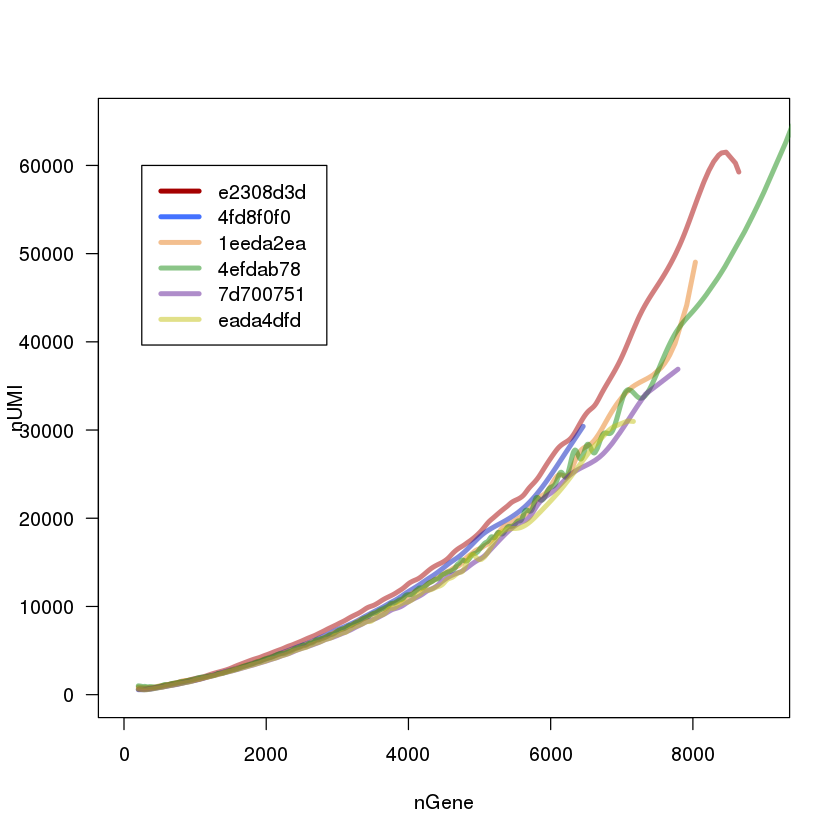

In [87]:
plot(1, type="n", xlim=c(0, 9000), ylim=c(0, 65000), xlab = "nGene", ylab = "nUMI", las = 1, pch = 16)

lines(smooth.spline(PPC028@meta.data$nGene, PPC028@meta.data$nUMI), col = "#a5000080", lwd = 4)
lines(smooth.spline(PPC030@meta.data$nGene, PPC030@meta.data$nUMI), col = "#0019bc80", lwd = 4)
lines(smooth.spline(PPC034@meta.data$nGene, PPC034@meta.data$nUMI), col = "#e8802080", lwd = 4)
lines(smooth.spline(PPC029@meta.data$nGene, PPC029@meta.data$nUMI), col = "#198c1380", lwd = 4)
lines(smooth.spline(PPC027@meta.data$nGene, PPC027@meta.data$nUMI), col = "#611c9680", lwd = 4)
lines(smooth.spline(PPC036@meta.data$nGene, PPC036@meta.data$nUMI), col = "#c4c11580", lwd = 4)



legend(250,60000, c("e2308d3d", "4fd8f0f0", "1eeda2ea", "4efdab78", "7d700751", "eada4dfd"),
                  lty=c(1,1,1,1,1,1),
                  lwd=c(4,4,4,4,4,4),
                  col=c("#a50000","#4472ff", "#e8802080", "#198c1380", "#611c9680", "#c4c11580"))

# Filter

In [231]:
samples = read.csv("../Table/ppc_sc_master_sample_sheet.csv")[, c("seq_sample_uuid", "UDID", "Subject_ID", "pct_PDX1_NKX6.1")]
samples$id <- str_split_fixed(samples$seq_sample_uuid, "-", 4)[, 1]

In [210]:
PPC028_filter1000 <- FilterCells(object = PPC028, subset.names = c("nGene", "nUMI"), low.thresholds = c(500, 1000))
PPC030_filter1000 <- FilterCells(object = PPC030, subset.names = c("nGene", "nUMI"), low.thresholds = c(500, 1000))
PPC034_filter1000 <- FilterCells(object = PPC034, subset.names = c("nGene", "nUMI"), low.thresholds = c(500, 1000))
PPC029_filter1000 <- FilterCells(object = PPC029, subset.names = c("nGene", "nUMI"), low.thresholds = c(500, 1000))
PPC027_filter1000 <- FilterCells(object = PPC027, subset.names = c("nGene", "nUMI"), low.thresholds = c(500, 1000))
PPC036_filter1000 <- FilterCells(object = PPC036, subset.names = c("nGene", "nUMI"), low.thresholds = c(500, 1000))

In [230]:
m = data.frame(UDID = c("PPC028",
      "PPC030",
      "PPC034",
      "PPC029",
      "PPC027",
      "PPC036"),

    total_cells = c(nrow(PPC028@meta.data),
      nrow(PPC030@meta.data),
      nrow(PPC034@meta.data),
      nrow(PPC029@meta.data),
      nrow(PPC027@meta.data),
      nrow(PPC036@meta.data)),

    filtered_cells = c(nrow(PPC028_filter1000@meta.data),
      nrow(PPC030_filter1000@meta.data),
      nrow(PPC034_filter1000@meta.data),
      nrow(PPC029_filter1000@meta.data),
      nrow(PPC027_filter1000@meta.data),
      nrow(PPC036_filter1000@meta.data)))

In [239]:
cellsfilt = merge(samples, m)
cellsfilt$percent_filtered = (1 - (cellsfilt$filtered_cells / cellsfilt$total_cells))*100

In [321]:
cellsfilt


UDID,seq_sample_uuid,Subject_ID,pct_PDX1_NKX6.1,id,total_cells,filtered_cells,percent_filtered
PPC027,7d700751-e80d-40b6-9e79-0efec5ae5a80,C0005,79.30,7d700751,9570,8831,7.722048
PPC028,e2308d3d-f183-44e4-b0b7-2dff4a5006da,T452,20.50,e2308d3d,7786,7137,8.335474
PPC029,4efdab78-1eda-4888-8483-15b519c375dc,T600,70.70,4efdab78,8612,7710,10.473758
PPC030,4fd8f0f0-2356-451c-a61f-c30610f1141c,S08401,80.30,4fd8f0f0,10222,9121,10.770886
PPC034,3ab5e63d-1d2d-441b-b1c3-7f77fd86e4dd,T104,71.02,3ab5e63d,10714,9883,7.756207
PPC034,1eeda2ea-453a-4ff4-9cae-2a68f823d919,T104,NA,1eeda2ea,10714,9883,7.756207
PPC036,eada4dfd-14cc-4767-8791-4a478eb3fe12,T600,76.60,eada4dfd,8908,8240,7.498877


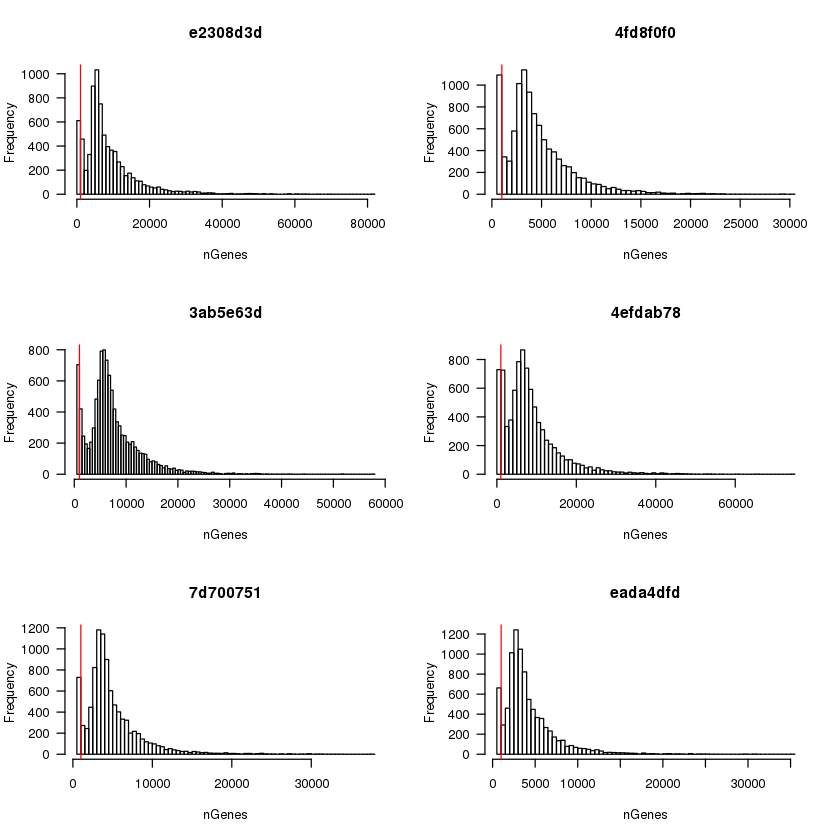

In [331]:
# VlnPlot(object = PPC028, features.plot = c("nGene"), nCol = 2)
# VlnPlot(object = PPC030, features.plot = c("nGene"), nCol = 2)
# VlnPlot(object = PPC034, features.plot = c("nGene"), nCol = 2)
# VlnPlot(object = PPC029, features.plot = c("nGene"), nCol = 2)
# VlnPlot(object = PPC027, features.plot = c("nGene"), nCol = 2)
# VlnPlot(object = PPC036, features.plot = c("nGene"), nCol = 2)

par(mfrow = c(3, 2))

hist(PPC028@meta.data$nUMI, breaks = 100, las = 1, xlab = "nGenes", main = "e2308d3d")
abline(v = 1000, col = "red")


hist(PPC030@meta.data$nUMI, breaks = 100, las = 1, xlab = "nGenes", main = "4fd8f0f0")
abline(v = 1000, col = "red")
hist(PPC034@meta.data$nUMI, breaks = 100, las = 1, xlab = "nGenes", main = "3ab5e63d")
abline(v = 1000, col = "red")
hist(PPC029@meta.data$nUMI, breaks = 100, las = 1, xlab = "nGenes", main = "4efdab78")
abline(v = 1000, col = "red")
hist(PPC027@meta.data$nUMI, breaks = 100, las = 1, xlab = "nGenes", main = "7d700751")
abline(v = 1000, col = "red")
hist(PPC036@meta.data$nUMI, breaks = 100, las = 1, xlab = "nGenes", main = "eada4dfd")
abline(v = 1000, col = "red")

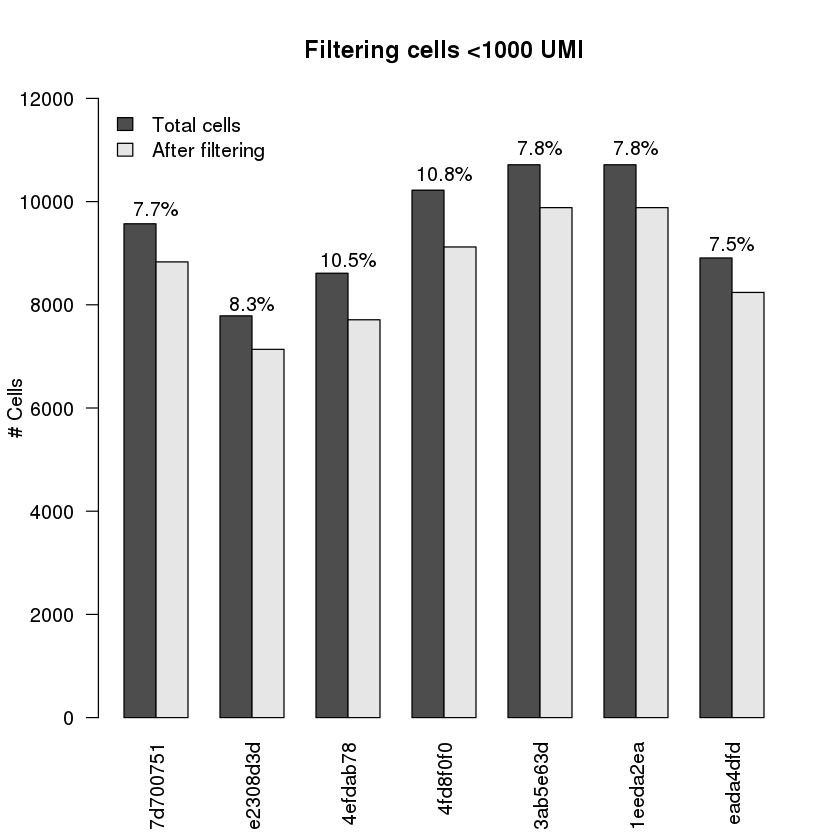

In [307]:
barplot(t(as.matrix(cellsfilt[, c("total_cells", "filtered_cells")])), beside=TRUE, las = 2, names.arg = cellsfilt$id, ylim = c(0, 12000), main = "Filtering cells <1000 UMI", ylab = "# Cells")
text(seq(2, nrow(cellsfilt) * 4, by = 3), cellsfilt$total_cells + (cellsfilt$total_cells * 0.03), paste(round(cellsfilt$percent_filtered, 1), "%", sep = ""))
legend("topleft", 
       legend = c("Total cells", "After filtering"), 
       fill = c("#4d4d4d", "#e6e6e6"), bg="transparent", bty = "n")

# Plot tSNE by nUMI

In [123]:
SeuratPCA <- function(tiss){

    tiss <- NormalizeData(object = tiss, scale.factor = 1e6)
    tiss <- ScaleData(object = tiss)
    tiss <- FindVariableGenes(object = tiss, do.plot = FALSE, x.high.cutoff = Inf, y.cutoff = 0.5, x.low.cutoff = 0.1)
    tiss <- RunPCA(object = tiss, do.print = FALSE)
    tiss <- ProjectPCA(object = tiss, do.print = FALSE)
    PCElbowPlot(object = tiss)
    return(tiss)    
}

SeuratTSNE <- function(tiss, n.pcs){
    res.used = 1.2
    tiss <- FindClusters(object = tiss, reduction.type = "pca", dims.use = 1:n.pcs, resolution = res.used, print.output = 0, save.SNN = TRUE,  force.recalc = TRUE)
    tiss <- RunTSNE(object = tiss, dims.use = 1:n.pcs, seed.use = 10, perplexity=30)
        
    tiss@meta.data$color <- "blue"
    tiss@meta.data[tiss@meta.data$nUMI < 1000, "color"] <- "red"
    
    tiss@meta.data$thresh <- "UMI >= 1000"
    tiss@meta.data[tiss@meta.data$nUMI < 1000, "thresh"] <- "UMI < 1000"
    
    tiss <- StashIdent(object = tiss, save.name = "Cluster")
    tiss <- SetAllIdent(object = tiss, id = "thresh")
    
    return(tiss)
}

In [95]:
PPC028.pca <- SeuratPCA(PPC028)
PPC028.pca.tsne <- SeuratTSNE(PPC028.pca, 12)

Scaling data matrix


In [124]:
PPC030.pca <- SeuratPCA(PPC030)
# PPC030.pca.tsne <- SeuratTSNE(PPC030.pca, 12)

Scaling data matrix


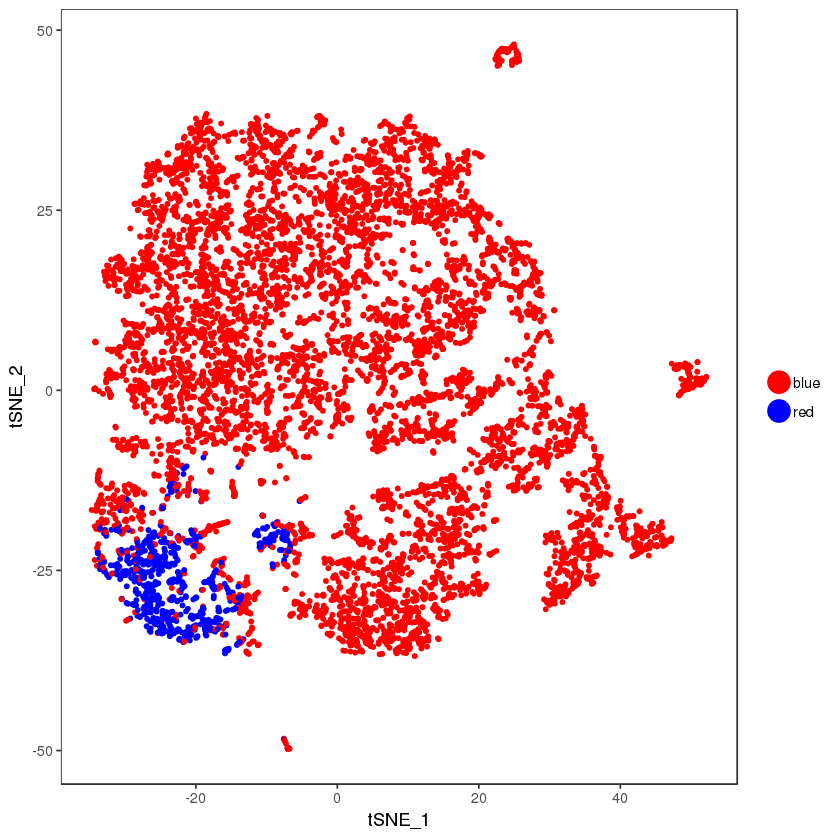

In [121]:
TSNEPlot(object = PPC028.pca.tsne, do.label = F, pt.size = 1, label.size = 4, colors.use = PPC028.pca.tsne@meta.data$color)

# Undetermined

In [342]:
library(stringr)

In [343]:
ud = read.csv("../Table/PPC_and CM_10X_read_count_per_lane.csv")

In [344]:
ud$reads <- as.numeric(gsub(",", "", ud$X.reads))

In [345]:
ud$id_sp = str_split_fixed(ud$id, "-", 4)[, 1]

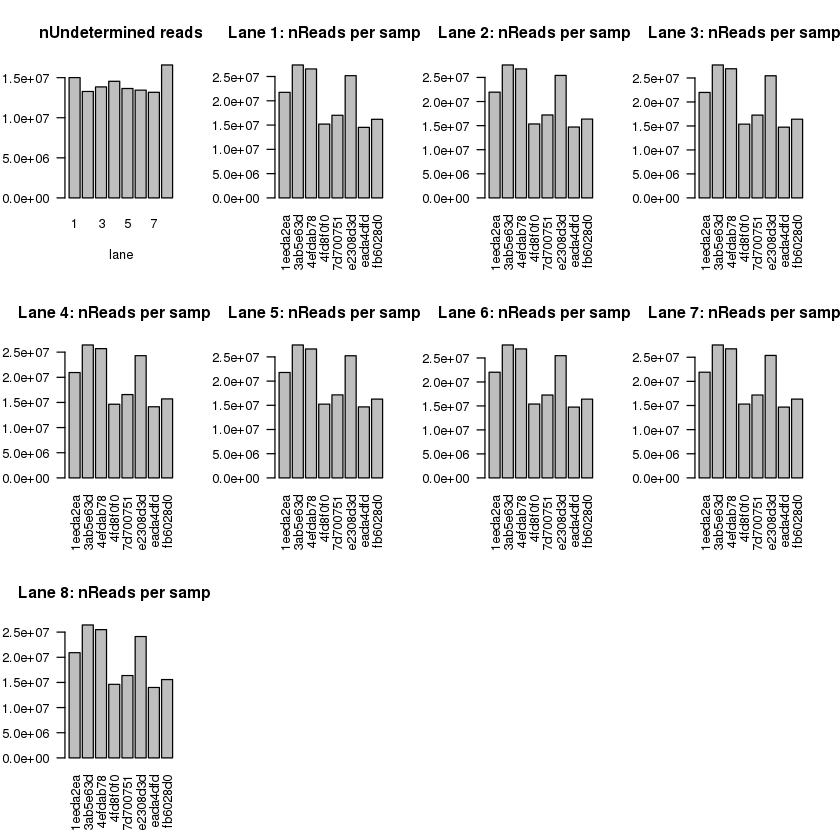

In [348]:
par(mfrow = c(3, 4))

ud.n = ud[ud$id == "Undetermined", ]
barplot(as.numeric(gsub(",", "", ud.n$X.reads)), names.arg = ud.n$lane, las = 2, main = "nUndetermined reads", las = 1, xlab = "lane")

ud.nv = ud[! ud$id == "Undetermined", ]

ud.nv_1 = ud.nv[ud.nv$lane == 1, ]
barplot(as.numeric(gsub(",", "", ud.nv_1$X.reads)), names.arg = ud.nv_1$id_sp, las = 2, main = "Lane 1: nReads per sample", las = 2, xlab = "")

ud.nv_1 = ud.nv[ud.nv$lane == 2, ]
barplot(as.numeric(gsub(",", "", ud.nv_1$X.reads)), names.arg = ud.nv_1$id_sp, las = 2, main = "Lane 2: nReads per sample", las = 2, xlab = "")


ud.nv_1 = ud.nv[ud.nv$lane == 3, ]
barplot(as.numeric(gsub(",", "", ud.nv_1$X.reads)), names.arg = ud.nv_1$id_sp, las = 2, main = "Lane 3: nReads per sample", las = 2, xlab = "")


ud.nv_1 = ud.nv[ud.nv$lane == 4, ]
barplot(as.numeric(gsub(",", "", ud.nv_1$X.reads)), names.arg = ud.nv_1$id_sp, las = 2, main = "Lane 4: nReads per sample", las = 2, xlab = "")


ud.nv_1 = ud.nv[ud.nv$lane == 5, ]
barplot(as.numeric(gsub(",", "", ud.nv_1$X.reads)), names.arg = ud.nv_1$id_sp, las = 2, main = "Lane 5: nReads per sample", las = 2, xlab = "")


ud.nv_1 = ud.nv[ud.nv$lane == 6, ]
barplot(as.numeric(gsub(",", "", ud.nv_1$X.reads)), names.arg = ud.nv_1$id_sp, las = 2, main = "Lane 6: nReads per sample", las = 2, xlab = "")


ud.nv_1 = ud.nv[ud.nv$lane == 7, ]
barplot(as.numeric(gsub(",", "", ud.nv_1$X.reads)), names.arg = ud.nv_1$id_sp, las = 2, main = "Lane 7: nReads per sample", las = 2, xlab = "")


ud.nv_1 = ud.nv[ud.nv$lane == 8, ]
barplot(as.numeric(gsub(",", "", ud.nv_1$X.reads)), names.arg = ud.nv_1$id_sp, las = 2, main = "Lane 8: nReads per sample", las = 2, xlab = "")



# Old

In [ ]:
# for( i in seq(1, nrow(samples))){
    
#     name = samples[i, "UDID"]
#     fn   = samples[i, "scouts"]
    
#     if(fn %in% sums){
        
#         assign(paste(name, "tiss", sep = "_"),  CreateSeuratFrazer(fn, name))        
        
#     }    
# }